# **생성모델(Generative Model): 오토인코더, GAN**

* 생성모델은 주어진 학습 데이터를 학습하여 학습 데이터의 분포를 따르는 유사한 데이터를 생성하는 모델
* 생성모델은 훈련 데이터를 통해 생성하는 규칙을 파악함

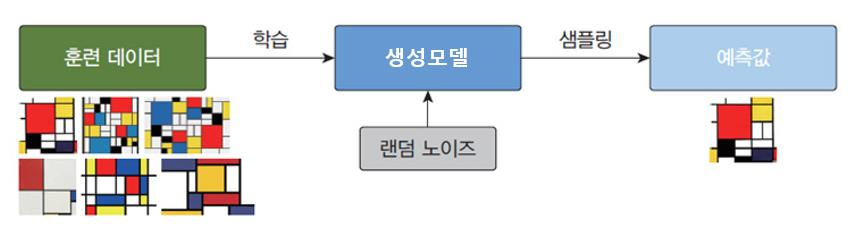

* 분류 모델은 조건부 확률인 p(y|x)를 알아내는 것. 즉 샘플 x가 주어진 상태에서 레이블 y의 확률을 추정 
* 생성 모델은 입력 데이터의 **확률 분포 p(x)**를 알려고 노력

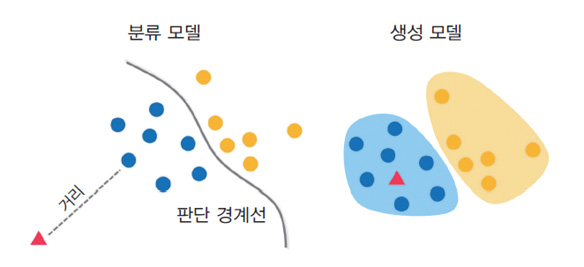

## **Autoencoder**

* 오토인코더(auto encoder)는 입력과 동일한 출력을 만드는 것을 목적으로 하는 신경망이다. 
* 오토인코더는 특징 학습, 차원 축소, 표현 학습 등에 많이 사용된다.
* 차원 축소(dimensionality reduction)


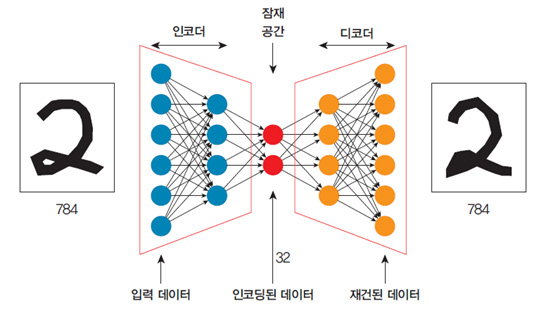


* 인코더(encoder): 입력을 잠재 표현으로 압축
* 디코더(decoder): 잠재 표현을 풀어서 입력을 복원
* 손실 함수: 입력 이미지와 출력 이미지의 MSE를 사용: 픽셀 간의 차이를 계산


### **준비 사항: 패키지 불러오기**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt
import numpy as np

### **데이터셋 불러오기 및 데이터셋 탐색**

MNIST 데이터베이스 (Modified National Institute of Standards and Technology database): 손으로 쓴 숫자들로 이루어진 대형 데이터베이스

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [4]:
X_train, X_test =X_train.astype('float32')/255, X_test.astype('float32')/255 

In [5]:
model = Sequential()
model.add(Dense(784, input_dim=28*28, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [6]:
model.compile(optimizer='adam', loss='mse') #binary_corssentropy

In [7]:
history = model.fit(X_train, X_train, epochs=15, validation_data=(X_test, X_test), batch_size=256) #self supervised

Epoch 1/15
235/235 [==============================] - 5s 20ms/step - loss: 0.0588 - val_loss: 0.0315
Epoch 2/15
235/235 [==============================] - 6s 24ms/step - loss: 0.0264 - val_loss: 0.0229
Epoch 3/15
235/235 [==============================] - 4s 16ms/step - loss: 0.0211 - val_loss: 0.0191
Epoch 4/15
235/235 [==============================] - 3s 14ms/step - loss: 0.0185 - val_loss: 0.0171
Epoch 5/15
235/235 [==============================] - 3s 14ms/step - loss: 0.0168 - val_loss: 0.0157
Epoch 6/15
235/235 [==============================] - 3s 14ms/step - loss: 0.0157 - val_loss: 0.0148
Epoch 7/15
235/235 [==============================] - 3s 14ms/step - loss: 0.0148 - val_loss: 0.0140
Epoch 8/15
235/235 [==============================] - 3s 14ms/step - loss: 0.0141 - val_loss: 0.0135
Epoch 9/15
235/235 [==============================] - 3s 14ms/step - loss: 0.0136 - val_loss: 0.0129
Epoch 10/15
235/235 [==============================] - 3s 14ms/step - loss: 0.0131 - val_lo

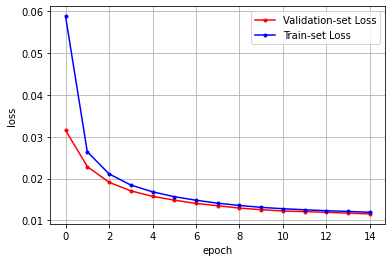

In [8]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
autoencoder_imgs = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


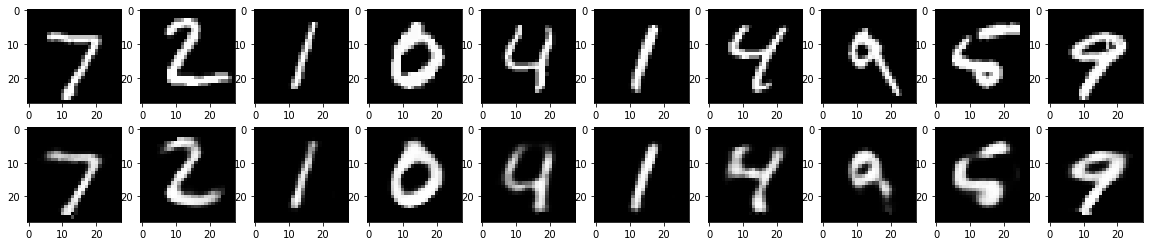

In [10]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(autoencoder_imgs[i].reshape(28, 28))
    plt.gray()
plt.show()

In [11]:
!pip install graphviz
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


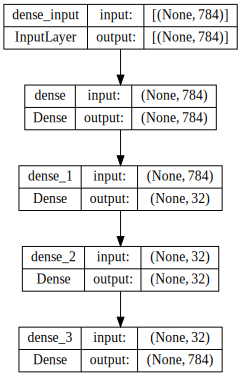

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True,  dpi=70).create(prog='dot', format='svg'))